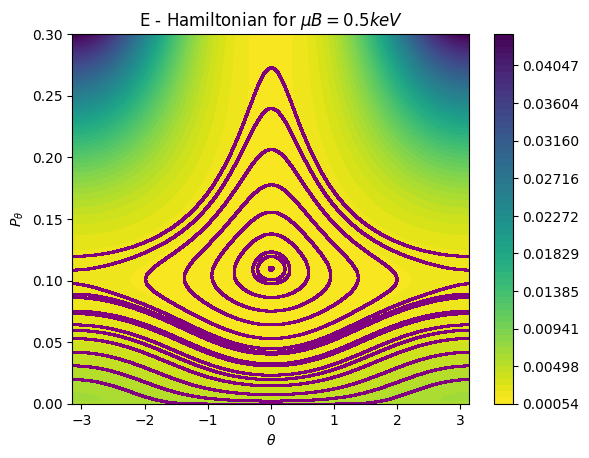

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import Paper_equations
import importlib

# import library with equations
importlib.reload(Paper_equations)

# Constants used in the equations
m = 10 ** (-3)
q_0 = 1
q_wall = 3.5

# Initial conditions for the differential equations (Runge-Kutta 4th order)
t0 = 0
initial_J = 0
initial_P_J = -0.1  
initial_psi_array = np.linspace(0.02, 0.12, 10)
initial_theta_array = [-np.pi, 0, np.pi]

# Generating mesh for the calculation of the hamiltonian
theta_vals = np.linspace(-np.pi, np.pi, 100)
psi_vals = np.linspace(0.0, 0.3, 100)
theta, psi = np.meshgrid(theta_vals, psi_vals)

# For the calculation of ψ_p we used th hypergeometric function
psi_p = psi/q_0*Paper_equations.calc_hyp2f1(psi, q_0, q_wall, 2).astype(np.float64)
# Hamiltonian of the GC W, calculation
W = (initial_P_J + psi_p)**2*((1-np.sqrt(2*psi)*np.cos(theta)))**2/2 + m*(1-np.sqrt(2*psi)*np.cos(theta))

levels = np.linspace(np.min(W), np.max(W), 60)
contour = plt.contourf(theta, psi, W, levels=levels, cmap = plt.colormaps.get_cmap('viridis').reversed())

plt.colorbar()
plt.xlabel('$\\theta$')
# plt.ylim(0,3)
# plt.xlim(0,3)
plt.ylabel('$P_{\\theta}$')
plt.title('E - Hamiltonian for $\\mu B = 0.5 keV$')

# We solve the ODEs for different initial values of θ and P_θ = ψ
for initial_psi in initial_psi_array:
    for initial_theta in initial_theta_array:
        y0 = np.array([initial_P_J, initial_psi, initial_J, initial_theta])
        tf = 1000  # Final time
        h = 0.005  # Step size
        
        # Solve the differential equations
        t_values = np.linspace(t0, tf, int(tf / h) + 1)
        y_values = Paper_equations.solve_with_odeint(Paper_equations.paper_differential_equations, t0, y0, tf, h, m, q_0)

        P_J_values = y_values[:, 0]
        psi_values = y_values[:, 1]
        J_values = y_values[:, 2]
        theta_values = y_values[:, 3]
        theta_values = np.mod(theta_values, 2*np.pi)
        theta_values = theta_values - 2*np.pi*(theta_values > np.pi)

        plt.scatter(theta_values, psi_values, s=0.5, c='purple')


# Displaying the plot
plt.show()
